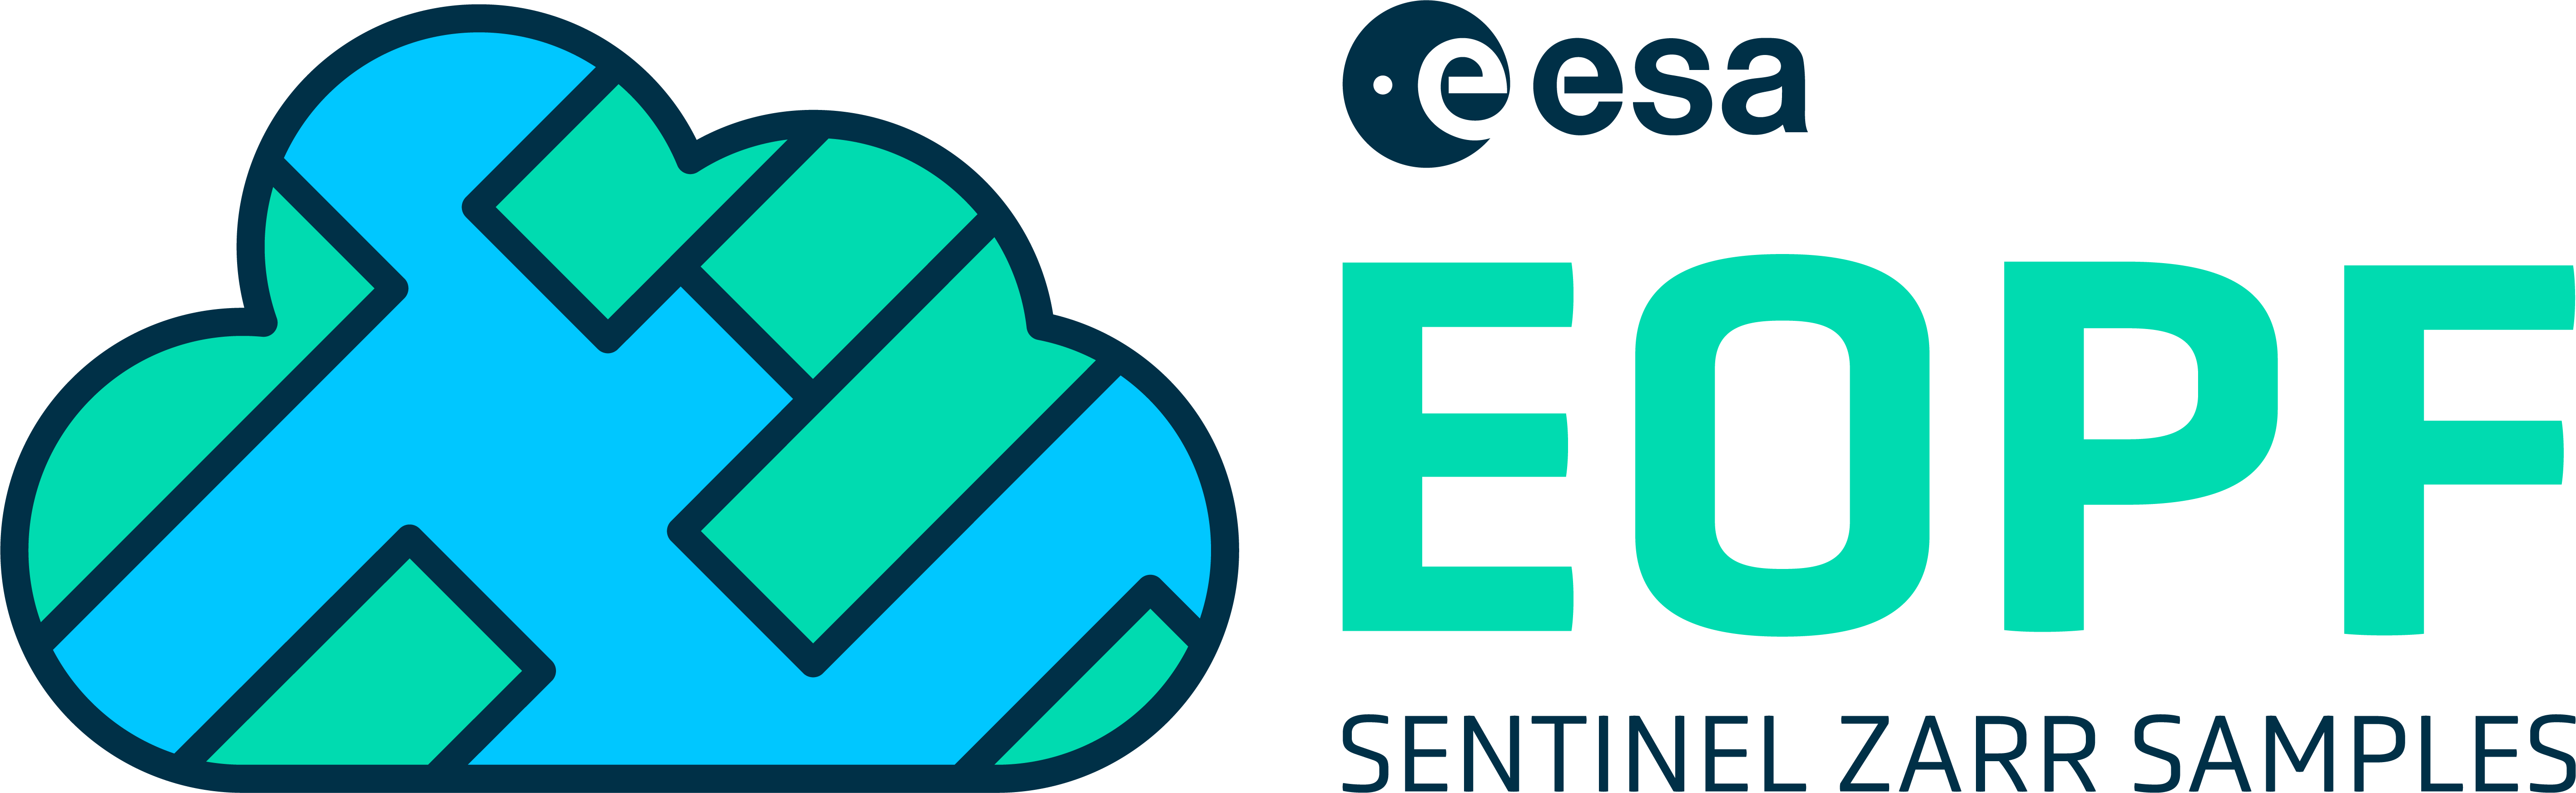

# Sentinel-1 L1 NRB product format prototype
## Table of Contents

1. [Introduction](#Introduction)
    - [Objectives](#Objectives)
    - [Relevant features](#Relevant-features)
    - [Notes](#Notes)
2. [Import modules](#Import-modules)
3. [Read products](#Read-products)
    - [Read local files with EOPF](#Read-local-files-with-EOPF)
    - [Read remote files with Xarray](#Read-remote-files-with-xarray)
4. [Product structure](#Product-structure)
     - [EOPF](#EOPF)
     - [Xarray](#Xarray)
         - [measurements](#measurements)
             - [nrb](#measurements.nrb)
             - [nlooks](#measurements.nlooks)
         - [conditions](#conditions)
             - [refdem](#conditions.refdem)
5. [Examples of product usage](#Examples-of-product-usage)
    - [Selection with decimation factor 16 x 16](#Selection-with-decimation-factor-16-x-16)
    - [Mix of different polarizations](#Mix-of-different-polarizations)
    - [Selection based on geographic coordinates](#Selection-based-on-geographic-coordinates)
    - [Mosaic](#Mosaic)
6. [Save & re-read derived products](#Save-and-re-read-derived-products)
    - [Save & re-read mosaic with Xarray from remote storage](#Save-and-re-read-mosaic-with-x-array-from-remote-storage)
    - [Save & re-read mosaic with Xarray from local storage](#Save-and-re-read-mosaic-with-x-array-from-local-storage)
    - [Read mosaic with EOPF from local storage](#Read-mosaic-with-EOPF-from-local-storage)


<a id="Introduction"></a>
# 1. Introduction

In this notebook we will show an example of slc TOPSAR product and some easy usage examples.

<a id="Objectives"></a>
## Objectives

- Allow easy access to NRB product
- Provide ready-to-use datasets and data variable
- Allow users to open and manipulate data using both standard external tools and the EOPF

<a id="Relevant-features"></a>
## Relevant features

- Different polarizations, acquisition times are aligned and can be stacked together
- The coordinates associated to the data are the phisical coordinates
- The zarr product will adhere to CF convetion (this allow the user to open the prodoct with standards tools, such as xarray, exploiting properly the data coordinates).
- Phase and phase_model are optional variables. If present NRB product is equivalent to GSLC.
- STAC attributes (will be added in future)

<a id="Notes"></a>
## Notes

This is a preliminary example of product

- Not all the metadata are included in these product prototype, but they will be included in the future.
- Among the excluded metadata, there are:
  - qualityInformation
- The stac attrabutes are still to be defined.
- The name of the variables are preliminary and they may change in the future.
- Variable and group attributes will be refined in the future, including:
  - long_name
  - units
  - standard names for coordinates
- The chunking is not defined yet.
- Products naming convention is to be defined.
- Reading from local and remote storage with EOPF is experimental (branch feat/coords_in_vars, commit 10a4f2e1) and not offically released.

<a id="Import-modules"></a>
# 2. Import modules

**Dependencies**
- numpy
- xarray
- datatree
- os
- matplotlib
- eopf


In [1]:
import numpy as np
import xarray as xr
import datatree
import matplotlib.pyplot as plt

<a id="Read-products"></a>
# 3. Read products


<a id="Read-local-files-with-EOPF"></a>
## Read local files with EOPF

**The listed file do not work with the latest eopf library and therefore the next cells are commented out**

In [2]:
# # local files
# !wget -q -r -nc -nH --cut-dirs=5 https://storage.sbg.cloud.ovh.net/v1/AUTH_8471d76cdd494d98a078f28b195dace4/sentinel-1-public/demo_product/nrb/ --no-parent -P /DIR_TO_WRITE_YOUR_PRODUCT/ --reject "index.html*"
# local_files = ['DIR_TO_WRITE_YOUR_PRODUCT/S01SIWNRB_20240106T170607_0028_A117_S000_5464A_DV.zarr',
#                'DIR_TO_WRITE_YOUR_PRODUCT/S01SIWNRB_20240205T051200_0027_A022_S000_5464A_DV.zarr',
#                'DIR_TO_WRITE_YOUR_PRODUCT/S01SIWNRB_20240205T051225_0028_A022_S000_5464A_DV.zarr']

In [3]:
# ss = EOZarrStore(local_files[2])
# aa = ss.open()

In [4]:
# eop = aa.load()

<a id="Read-remote-files-with-xarray"></a>
## Read remote files with xarray


In [5]:
# remote fles
files = [
    "https://storage.sbg.cloud.ovh.net/v1/AUTH_8471d76cdd494d98a078f28b195dace4/sentinel-1-public/demo_product/nrb/S01SIWNRB_20240106T170607_0028_A117_S000_5464A_DV.zarr",
    "https://storage.sbg.cloud.ovh.net/v1/AUTH_8471d76cdd494d98a078f28b195dace4/sentinel-1-public/demo_product/nrb/S01SIWNRB_20240205T051200_0027_A022_S000_5464A_DV.zarr",
    "https://storage.sbg.cloud.ovh.net/v1/AUTH_8471d76cdd494d98a078f28b195dace4/sentinel-1-public/demo_product/nrb/S01SIWNRB_20240205T051225_0028_A022_S000_5464A_DV.zarr",
]

In [6]:
dt = {}

for k, f in enumerate(files):
    dt[k] = datatree.open_datatree(f, engine="zarr", chunks={})

<a id="Product-structure"></a>
# 4. Product structure


<a id="EOPF"></a>
## EOPF


In [7]:
# eop

<a id="Xarray"></a>
## Xarray


In [8]:
dt[0]

DataTree('None', parent=None)
├── DataTree('conditions')
│   ├── DataTree('VH')
│   │   ├── DataTree('attitude')
│   │   │       Dimensions:       (azimuth_time: 25)
│   │   │       Coordinates:
│   │   │         * azimuth_time  (azimuth_time) datetime64[ns] 200B 2024-01-06T17:06:09.7500...
│   │   │       Data variables:
│   │   │           pitch         (azimuth_time) float64 200B dask.array<chunksize=(25,), meta=np.ndarray>
│   │   │           q0            (azimuth_time) float64 200B dask.array<chunksize=(25,), meta=np.ndarray>
│   │   │           q1            (azimuth_time) float64 200B dask.array<chunksize=(25,), meta=np.ndarray>
│   │   │           q2            (azimuth_time) float64 200B dask.array<chunksize=(25,), meta=np.ndarray>
│   │   │           q3            (azimuth_time) float64 200B dask.array<chunksize=(25,), meta=np.ndarray>
│   │   │           roll          (azimuth_time) float64 200B dask.array<chunksize=(25,), meta=np.ndarray>
│   │   │           wx            (azimuth_time) float64 200B dask.array<chunksize=(25,), meta=np.ndarray>
│   │   │           wy            (azimuth_time) float64 200B dask.array<chunksize=(25,), meta=np.ndarray>
│   │   │           wz            (azimuth_time) float64 200B dask.array<chunksize=(25,), meta=np.ndarray>
│   │   │           yaw           (azimuth_time) float64 200B dask.array<chunksize=(25,), meta=np.ndarray>
│   │   │       Attributes: (12/17)
│   │   │           Conventions:                         CF-1.8
│   │   │           ascending_node_time:                 2024-01-06T16:55:02.072764
│   │   │           comment:                             The dataset contains a sets of attit...
│   │   │           family_name:                         SENTINEL-1
│   │   │           group:                               /IW1/VH/attitude
│   │   │           history:                             created by xarray_sentinel-0.9.5
│   │   │           ...                                  ...
│   │   │           relative_orbit_number:               117
│   │   │           start_time:                          2024-01-06T17:06:07.213171
│   │   │           stop_time:                           2024-01-06T17:06:35.139959
│   │   │           swaths:                              ['IW1', 'IW2', 'IW3']
│   │   │           title:                               Attitude information used by the IPF...
│   │   │           transmitter_receiver_polarisations:  ['VV', 'VH']
│   │   ├── DataTree('azimuth_fm_rate')
│   │   │       Dimensions:                     (azimuth_time: 10, degree: 3)
│   │   │       Coordinates:
│   │   │         * azimuth_time                (azimuth_time) datetime64[ns] 80B 2024-01-06T...
│   │   │         * degree                      (degree) int64 24B 0 1 2
│   │   │       Data variables:
│   │   │           azimuth_fm_rate_polynomial  (azimuth_time, degree) float64 240B dask.array<chunksize=(10, 3), meta=np.ndarray>
│   │   │           t0                          (azimuth_time) float64 80B dask.array<chunksize=(10,), meta=np.ndarray>
│   │   │       Attributes: (12/15)
│   │   │           Conventions:                         CF-1.8
│   │   │           ascending_node_time:                 2024-01-06T16:55:02.072764
│   │   │           family_name:                         SENTINEL-1
│   │   │           group:                               /IW1/VH/azimuth_fm_rate
│   │   │           history:                             created by xarray_sentinel-0.9.5
│   │   │           mode:                                IW
│   │   │           ...                                  ...
│   │   │           product_type:                        SLC
│   │   │           relative_orbit_number:               117
│   │   │           start_time:                          2024-01-06T17:06:07.213171
│   │   │           stop_time:                           2024-01-06T17:06:35.139959
│   │   │           swaths:                              ['IW1', 'IW2', 'IW3']
│   │   │           transmitter_receiver_pol

<a id="measurements"></a>
### measurements


In [9]:
dt[0].measurements

DataTree('measurements', parent="None")
    Dimensions:       (y: 23590, x: 28030, polarization: 2, time: 1)
    Coordinates:
      * polarization  (polarization) <U2 16B 'VV' 'VH'
      * time          (time) datetime64[ns] 8B 2024-01-06
      * x             (x) float64 224kB 1.507e+05 1.507e+05 ... 4.309e+05 4.309e+05
      * y             (y) float64 189kB 4.524e+06 4.524e+06 ... 4.76e+06 4.76e+06
    Data variables:
        gamma_ref     (y, x) float64 5GB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
        inc           (y, x) float64 5GB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
        mask          (y, x) int8 661MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
        nlooks        (y, x) float64 5GB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
        nrb           (polarization, time, y, x) float64 11GB dask.array<chunksize=(1, 1, 1024, 1024), meta=np.ndarray>
        phase         (polarization, time, y, x) float64 11GB dask.array<chunksize=(1, 1, 1024, 1024), meta=np.ndarray>
        phase_model   (time, y, x) float64 5GB dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>

<a id="nrb"></a>
#### measurements.nrb


In [10]:
dt[0].measurements.nrb

<xarray.DataArray 'nrb' (polarization: 2, time: 1, y: 23590, x: 28030)> Size: 11GB
dask.array<open_dataset-nrb, shape=(2, 1, 23590, 28030), dtype=float64, chunksize=(1, 1, 1024, 1024), chunktype=numpy.ndarray>
Coordinates:
  * polarization  (polarization) <U2 16B 'VV' 'VH'
  * time          (time) datetime64[ns] 8B 2024-01-06
  * x             (x) float64 224kB 1.507e+05 1.507e+05 ... 4.309e+05 4.309e+05
  * y             (y) float64 189kB 4.524e+06 4.524e+06 ... 4.76e+06 4.76e+06
Attributes:
    description:   A random variable created as an example.
    grid_mapping:  spatial_ref
    long_name:     terrain corrected gamma nought
    units:         m^2 / m^2

<a id="nlooks"></a>
#### measurements.nlooks


In [11]:
dt[0].measurements.nlooks

<xarray.DataArray 'nlooks' (y: 23590, x: 28030)> Size: 5GB
dask.array<open_dataset-nlooks, shape=(23590, 28030), dtype=float64, chunksize=(1024, 1024), chunktype=numpy.ndarray>
Coordinates:
  * x        (x) float64 224kB 1.507e+05 1.507e+05 ... 4.309e+05 4.309e+05
  * y        (y) float64 189kB 4.524e+06 4.524e+06 ... 4.76e+06 4.76e+06
Attributes:
    description:   Number of averaged radar cells
    grid_mapping:  spatial_ref
    long_name:     Number of looks
    units:         n/a

<a id="conditions"></a>
### conditions


<a id="refdem"></a>
#### conditions.refdem


In [12]:
dt[0].conditions.refdem

DataTree('refdem', parent="conditions")
    Dimensions:  (y: 10980, x: 10980)
    Coordinates:
      * x        (x) float64 88kB 2e+05 2e+05 2e+05 ... 3.098e+05 3.098e+05
      * y        (y) float64 88kB 4.7e+06 4.7e+06 4.7e+06 ... 4.59e+06 4.59e+06
    Data variables:
        dem      (y, x) float32 482MB dask.array<chunksize=(687, 687), meta=np.ndarray>

<a id="Examples-of-product-usage"></a>
# 5. Examples of product usage


<a id="Selection-with-decimation-factor-16-x-16"></a>
## Selection with decimation factor 16 x 16


In [13]:
dt_sel = dt[0].measurements.isel(x=slice(None, None, 16), y=slice(None, None, 16))

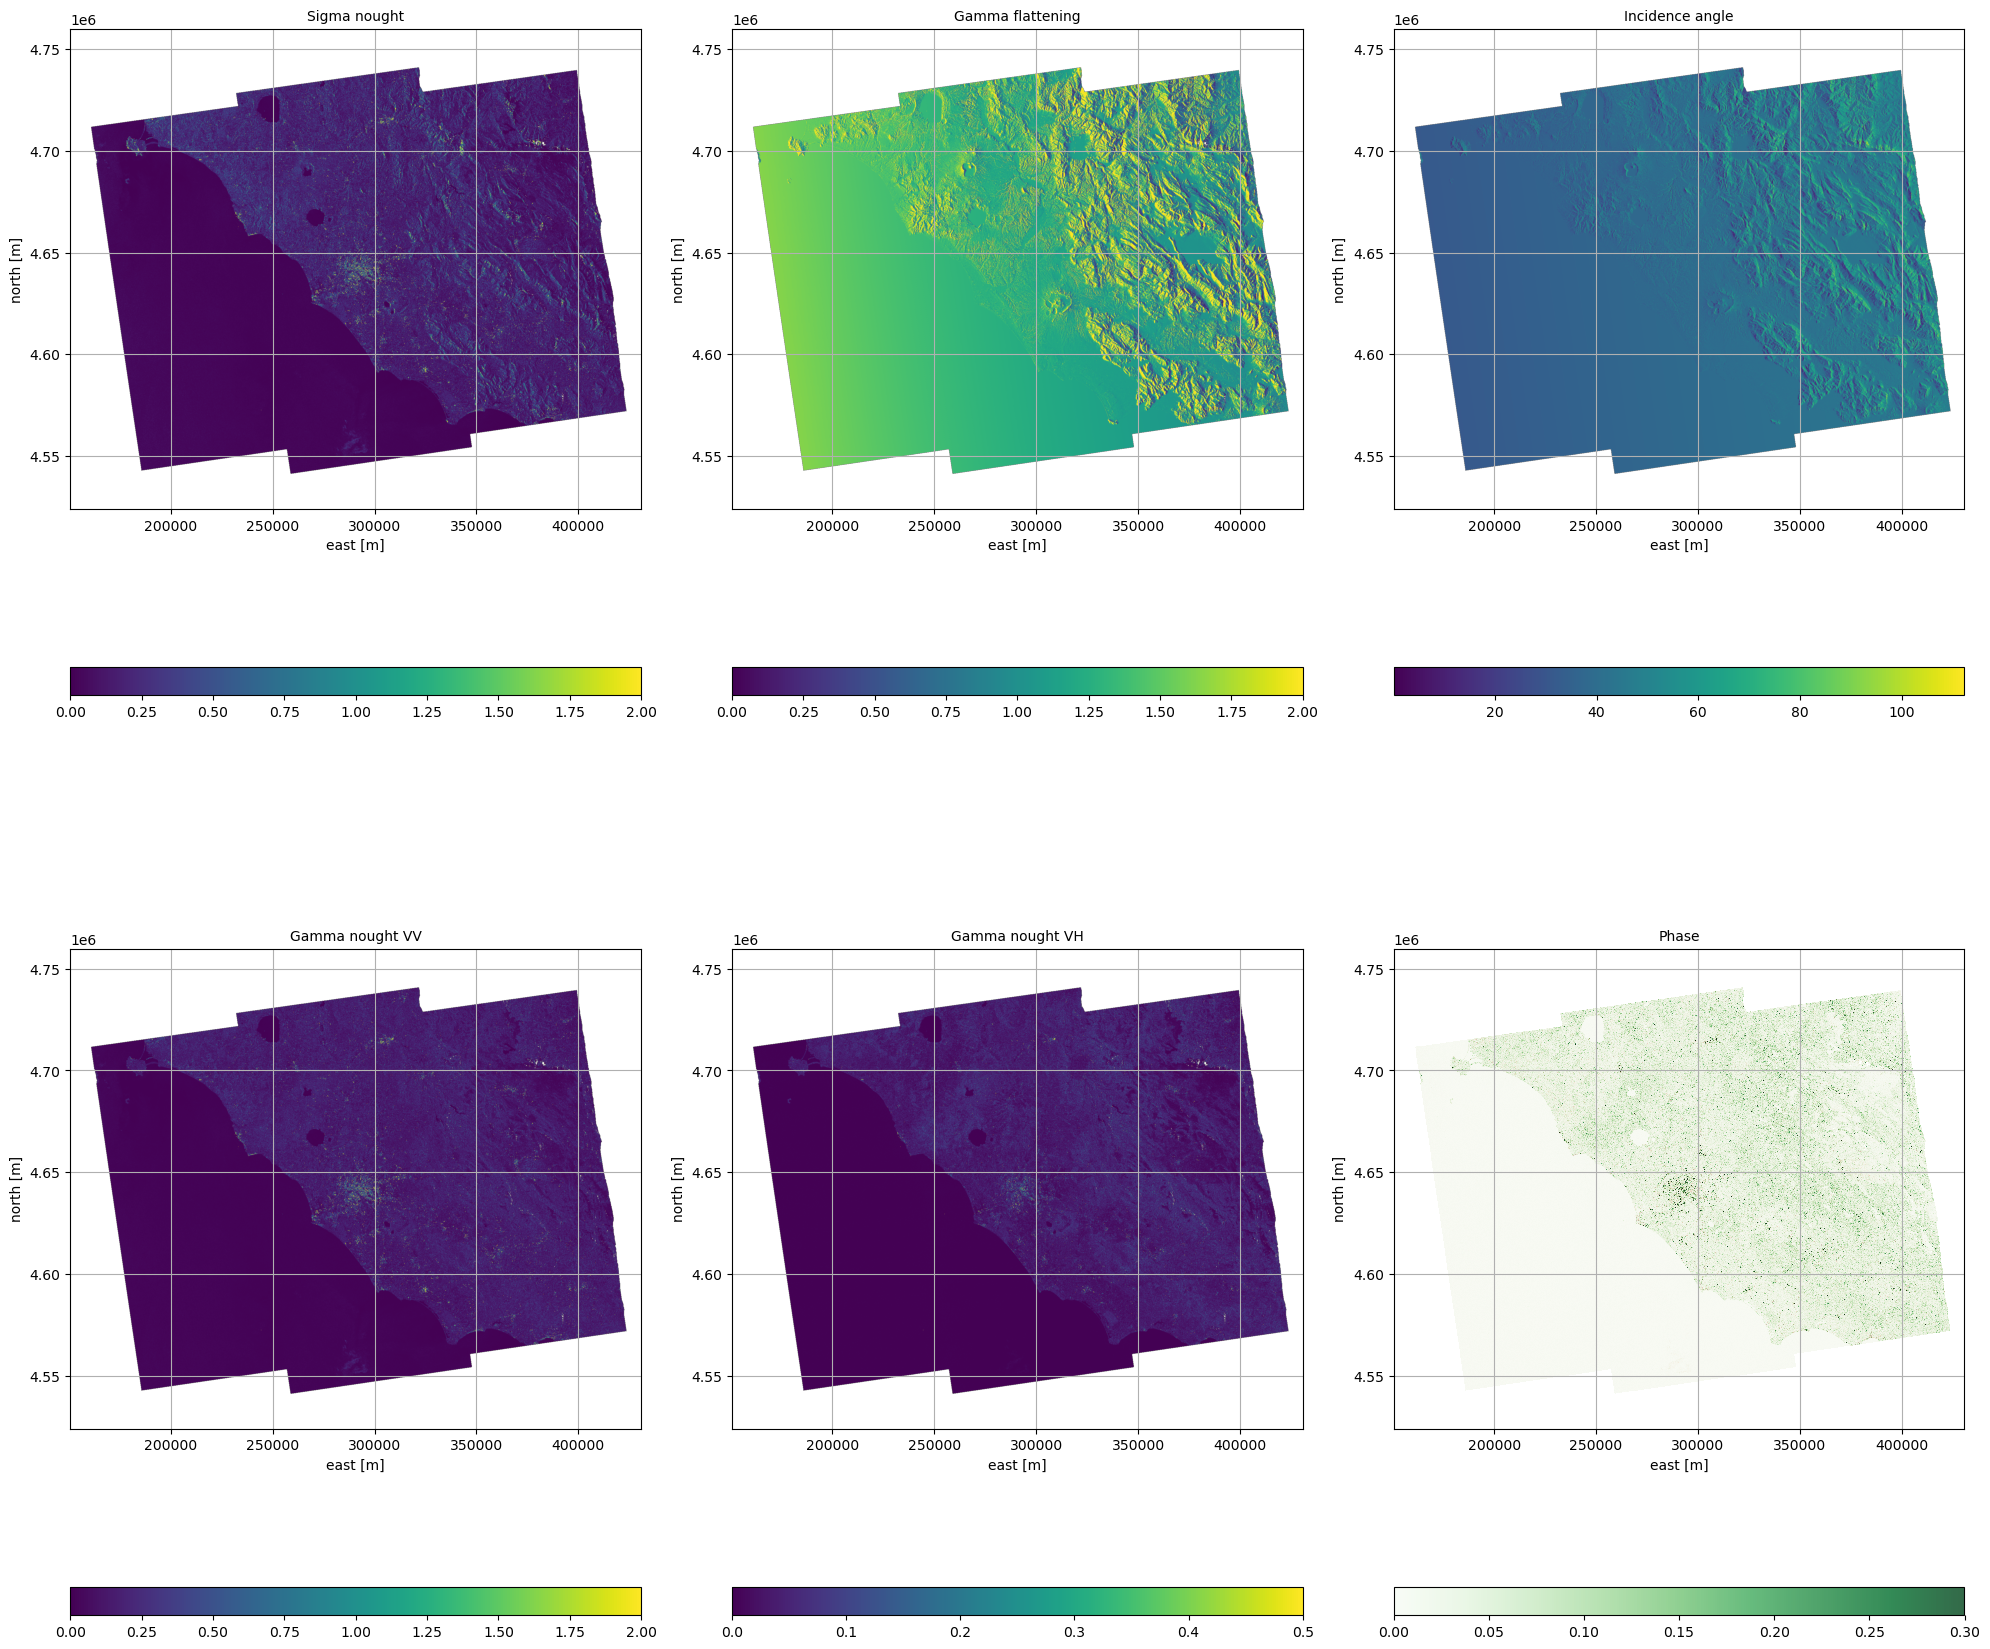

/home/mclaus@eurac.edu/micromamba/envs/eopf-zarr/lib/python3.11/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


In [14]:
extent = [
    dt_sel.x.min().values,
    dt_sel.x.max().values,
    dt_sel.y.min().values,
    dt_sel.y.max().values,
]
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(
    nrows=2, ncols=3, figsize=(20, 20)
)
f = ax1.imshow(
    dt_sel.nrb.sel(polarization="VV", time=np.datetime64("2024-01-06", "ns"))
    * dt_sel.gamma_ref,
    vmin=0,
    vmax=2,
    origin="lower",
    extent=extent,
)
ax1.set_xlabel("east [m]", fontsize=10)
ax1.set_ylabel("north [m]", fontsize=10)
ax1.set_title("Sigma nought", fontsize=10)
ax1.grid()
fig.colorbar(f, ax=ax1, orientation="horizontal")

f = ax2.imshow(dt_sel.gamma_ref, vmin=0, vmax=2, origin="lower", extent=extent)
ax2.set_xlabel("east [m]", fontsize=10)
ax2.set_ylabel("north [m]", fontsize=10)
ax2.set_title("Gamma flattening", fontsize=10)
ax2.grid()
fig.colorbar(f, ax=ax2, orientation="horizontal")

f = ax3.imshow(dt_sel.inc, origin="lower", extent=extent)
ax3.set_xlabel("east [m]", fontsize=10)
ax3.set_ylabel("north [m]", fontsize=10)
ax3.set_title("Incidence angle", fontsize=10)
ax3.grid()
fig.colorbar(f, ax=ax3, orientation="horizontal")

f = ax4.imshow(
    dt_sel.nrb.sel(polarization="VV", time=np.datetime64("2024-01-06", "ns")),
    vmin=0,
    vmax=2,
    origin="lower",
    extent=extent,
)
ax4.set_xlabel("east [m]", fontsize=10)
ax4.set_ylabel("north [m]", fontsize=10)
ax4.set_title("Gamma nought VV", fontsize=10)
ax4.grid()
fig.colorbar(f, ax=ax4, orientation="horizontal")

f = ax5.imshow(
    dt_sel.nrb.sel(polarization="VH", time=np.datetime64("2024-01-06", "ns")),
    vmin=0,
    vmax=0.5,
    origin="lower",
    extent=extent,
)
ax5.set_xlabel("east [m]", fontsize=10)
ax5.set_ylabel("north [m]", fontsize=10)
ax5.set_title("Gamma nought VH", fontsize=10)
ax5.grid()
fig.colorbar(f, ax=ax5, orientation="horizontal")

im1 = ax6.imshow(
    dt_sel.nrb.sel(polarization="VV", time=np.datetime64("2024-01-06", "ns")),
    cmap=plt.cm.Reds,
    interpolation="nearest",
    vmin=0,
    vmax=2,
    origin="lower",
    extent=extent,
)
im1 = ax6.imshow(
    dt_sel.nrb.sel(polarization="VH", time=np.datetime64("2024-01-06", "ns")),
    cmap=plt.cm.Greens,
    interpolation="nearest",
    vmin=0,
    vmax=0.3,
    alpha=0.8,
    origin="lower",
    extent=extent,
)
# f = ax6.imshow(wrap(dt_sel.phase.sel(polarization='VV', time=np.datetime64('2024-01-06', 'ns'))), vmin=-np.pi, vmax=np.pi, origin='lower', extent=extent)
ax6.set_xlabel("east [m]", fontsize=10)
ax6.set_ylabel("north [m]", fontsize=10)
ax6.set_title("Phase", fontsize=10)
ax6.grid()
fig.colorbar(im1, ax=ax6, orientation="horizontal")

fig.tight_layout()

<a id="Mix-of-different-polarizations"></a>
## Mix of different polarizations


In [15]:
# rescaling for visualization purpose
vv_max = (
    dt_sel.nrb.sel(polarization="VV", time=np.datetime64("2024-01-06", "ns"))
    .compute()
    .quantile(0.9, skipna=True)
)
vh_max = (
    dt_sel.nrb.sel(polarization="VH", time=np.datetime64("2024-01-06", "ns"))
    .compute()
    .quantile(0.9, skipna=True)
)
r = (
    dt_sel.nrb.sel(polarization="VV", time=np.datetime64("2024-01-06", "ns")).drop(
        ["polarization", "time"]
    )
    / vv_max
)
g = (
    dt_sel.nrb.sel(polarization="VH", time=np.datetime64("2024-01-06", "ns")).drop(
        ["polarization", "time"]
    )
    / vh_max
)
b = 2 * np.abs(r - g) / (r + g)

/tmp/ipykernel_1126868/4188562811.py:13: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  dt_sel.nrb.sel(polarization="VV", time=np.datetime64("2024-01-06", "ns")).drop(
/tmp/ipykernel_1126868/4188562811.py:19: DeprecationWarning: dropping variables using `drop` is deprecated; use drop_vars.
  dt_sel.nrb.sel(polarization="VH", time=np.datetime64("2024-01-06", "ns")).drop(


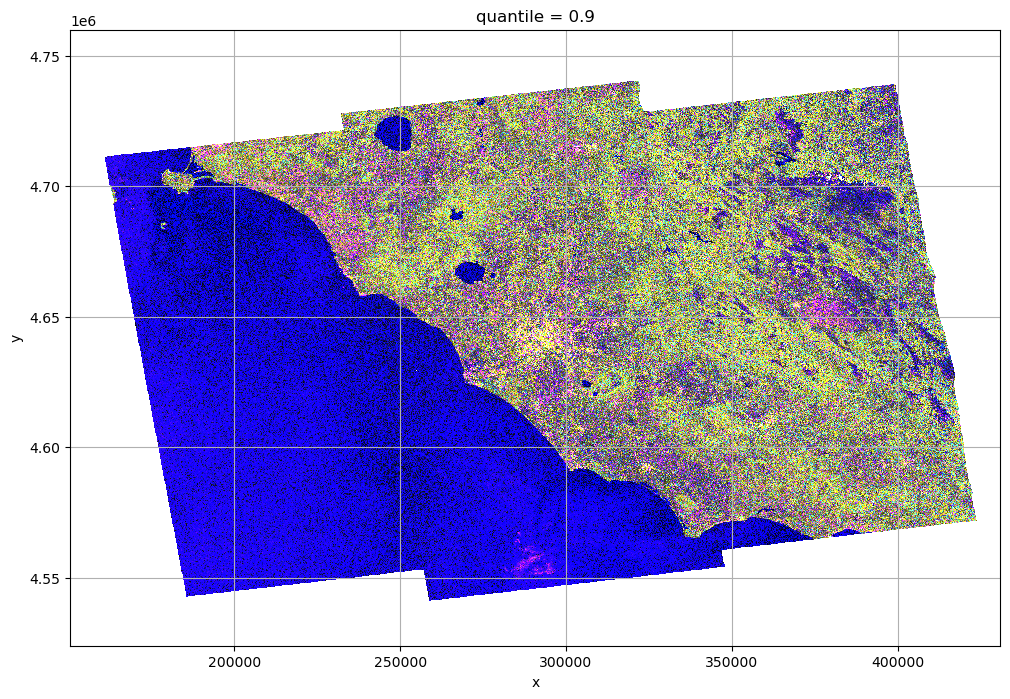

In [16]:
# concatenation of different bands
rgb = xr.concat([r, g, b], dim="rgb")
rgb = xr.where(rgb > 1, 1, rgb)
plt.figure(figsize=(12, 8))
rgb.plot.imshow(rgb="rgb")
plt.grid()

<a id="Selection-based-on-geographic-coordinates"></a>
## Selection based on geographic coordinates


In [17]:
dt_sel = []
for k, v in dt.items():
    dt_sel.append(
        v.measurements.sel(x=slice(260005, 360005), y=slice(4500025, 4800025))
        .to_dataset()
        .chunk(1024)
    )

In [18]:
dt_sel[0]

<xarray.Dataset> Size: 15GB
Dimensions:       (y: 23590, x: 10001, polarization: 2, time: 1)
Coordinates:
  * polarization  (polarization) <U2 16B 'VV' 'VH'
  * time          (time) datetime64[ns] 8B 2024-01-06
  * x             (x) float64 80kB 2.6e+05 2.6e+05 2.6e+05 ... 3.6e+05 3.6e+05
  * y             (y) float64 189kB 4.524e+06 4.524e+06 ... 4.76e+06 4.76e+06
Data variables:
    gamma_ref     (y, x) float64 2GB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
    inc           (y, x) float64 2GB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
    mask          (y, x) int8 236MB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
    nlooks        (y, x) float64 2GB dask.array<chunksize=(1024, 1024), meta=np.ndarray>
    nrb           (polarization, time, y, x) float64 4GB dask.array<chunksize=(2, 1, 1024, 1024), meta=np.ndarray>
    phase         (polarization, time, y, x) float64 4GB dask.array<chunksize=(2, 1, 1024, 1024), meta=np.ndarray>
    phase_model   (time, y, x) float64 2GB dask.array<chunksize=(1, 1024, 1024), meta=np.ndarray>

<a id="Mosaic"></a>
## Mosaic


In [ ]:
dt_align = xr.align(*dt_sel, join="outer", fill_value=0)

In [ ]:
nrb, w = [], []

for i in dt_align:
    a = i.nrb.sel(polarization="VV").sum(dim="time")
    a = a.where(np.isfinite(a), other=0)
    nrb.append(a)
    a = i.nlooks
    a = a.where(np.isfinite(a), other=0)
    w.append(a)

In [ ]:
nlooks = w[0] + w[1] + w[2]
mosaic = (nrb[0] * w[0] + nrb[1] * w[1] + nrb[2] * w[2]) / nlooks

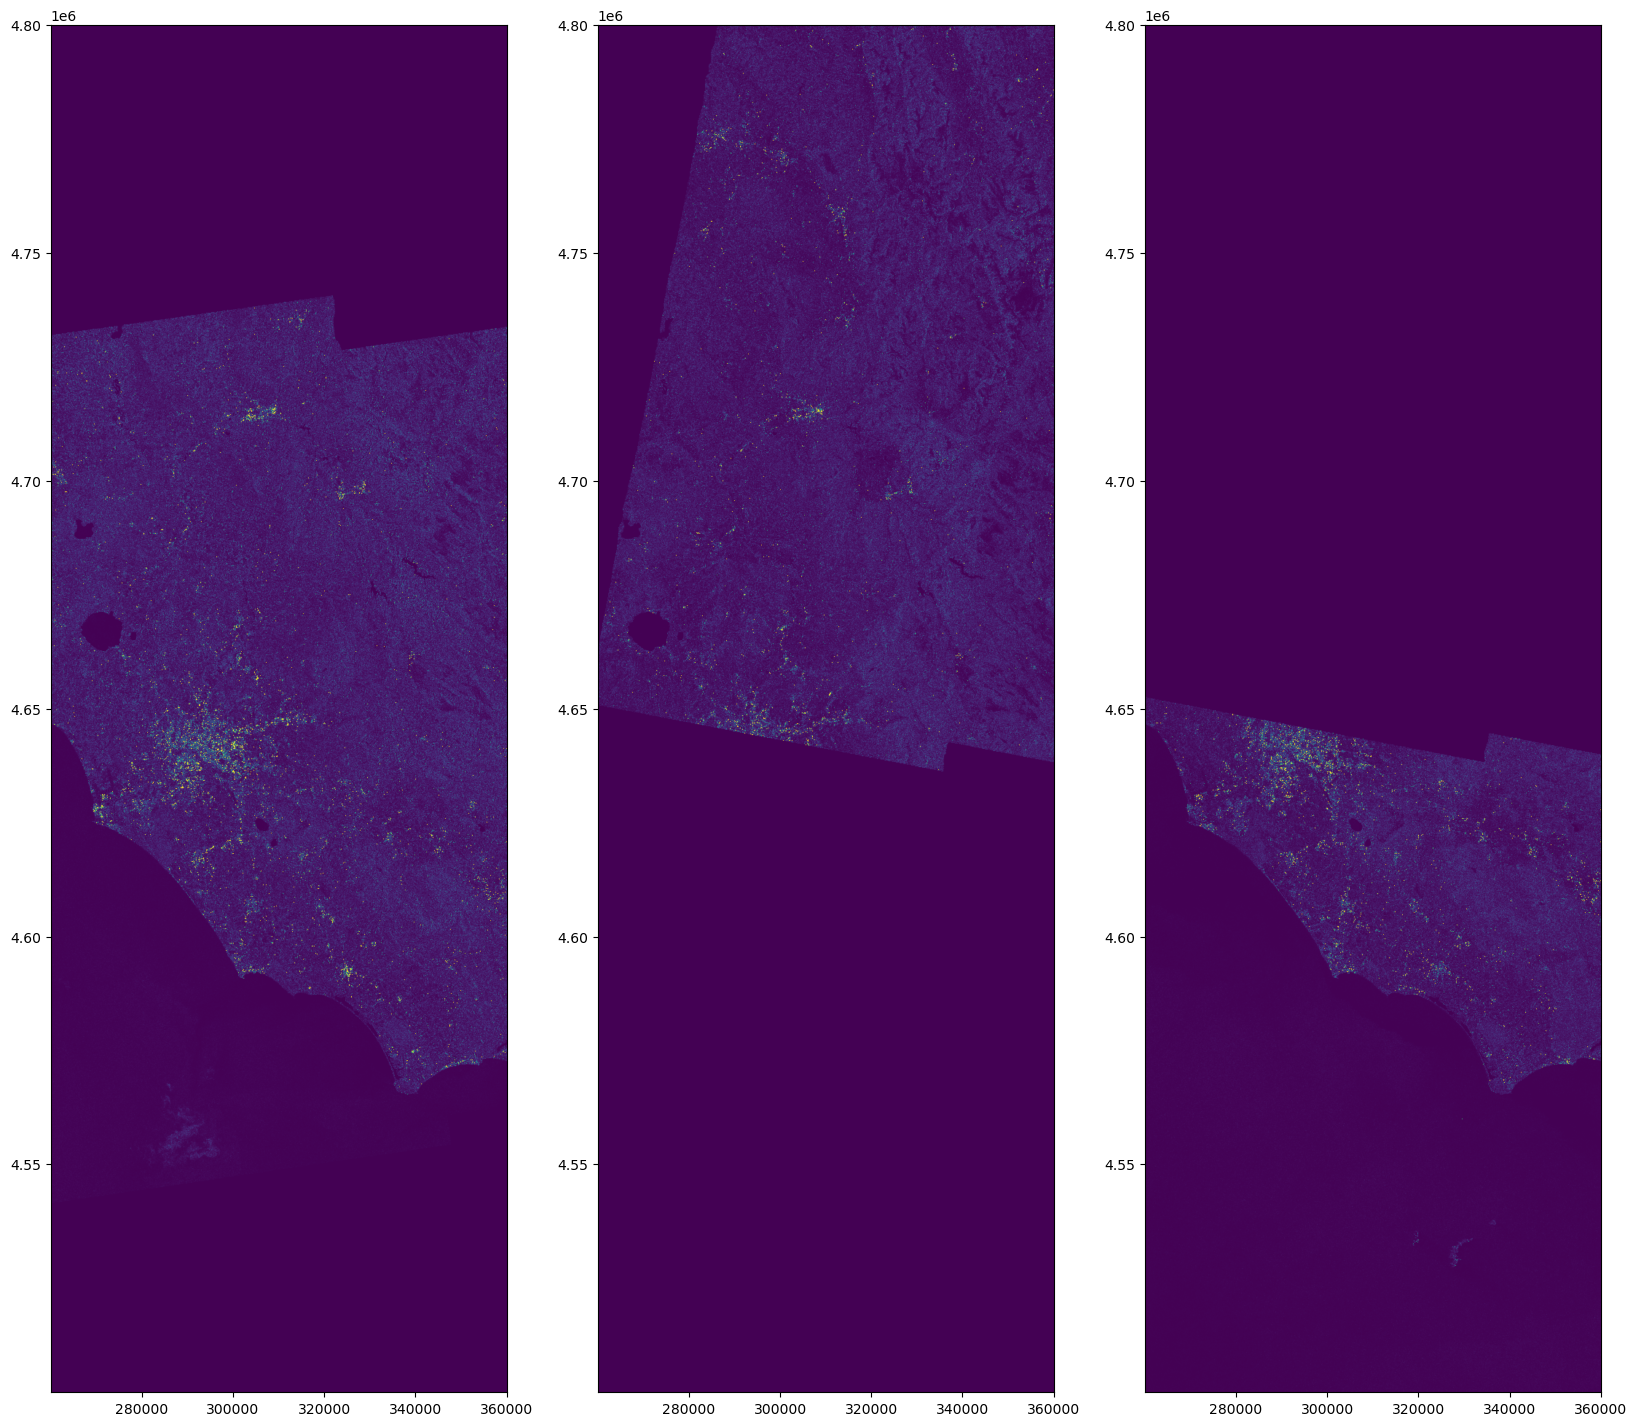

In [ ]:
extent = [
    mosaic.x.min().values,
    mosaic.x.max().values,
    mosaic.y.min().values,
    mosaic.y.max().values,
]
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 20))
im1 = ax1.imshow(
    nrb[0].isel(x=slice(None, None, 16), y=slice(None, None, 16)),
    interpolation="bilinear",
    vmin=0,
    vmax=2,
    origin="lower",
    extent=extent,
)
im2 = ax2.imshow(
    nrb[1].isel(x=slice(None, None, 16), y=slice(None, None, 16)),
    interpolation="bilinear",
    vmin=0,
    vmax=2,
    origin="lower",
    extent=extent,
)
im3 = ax3.imshow(
    nrb[2].isel(x=slice(None, None, 16), y=slice(None, None, 16)),
    interpolation="bilinear",
    vmin=0,
    vmax=2,
    origin="lower",
    extent=extent,
)

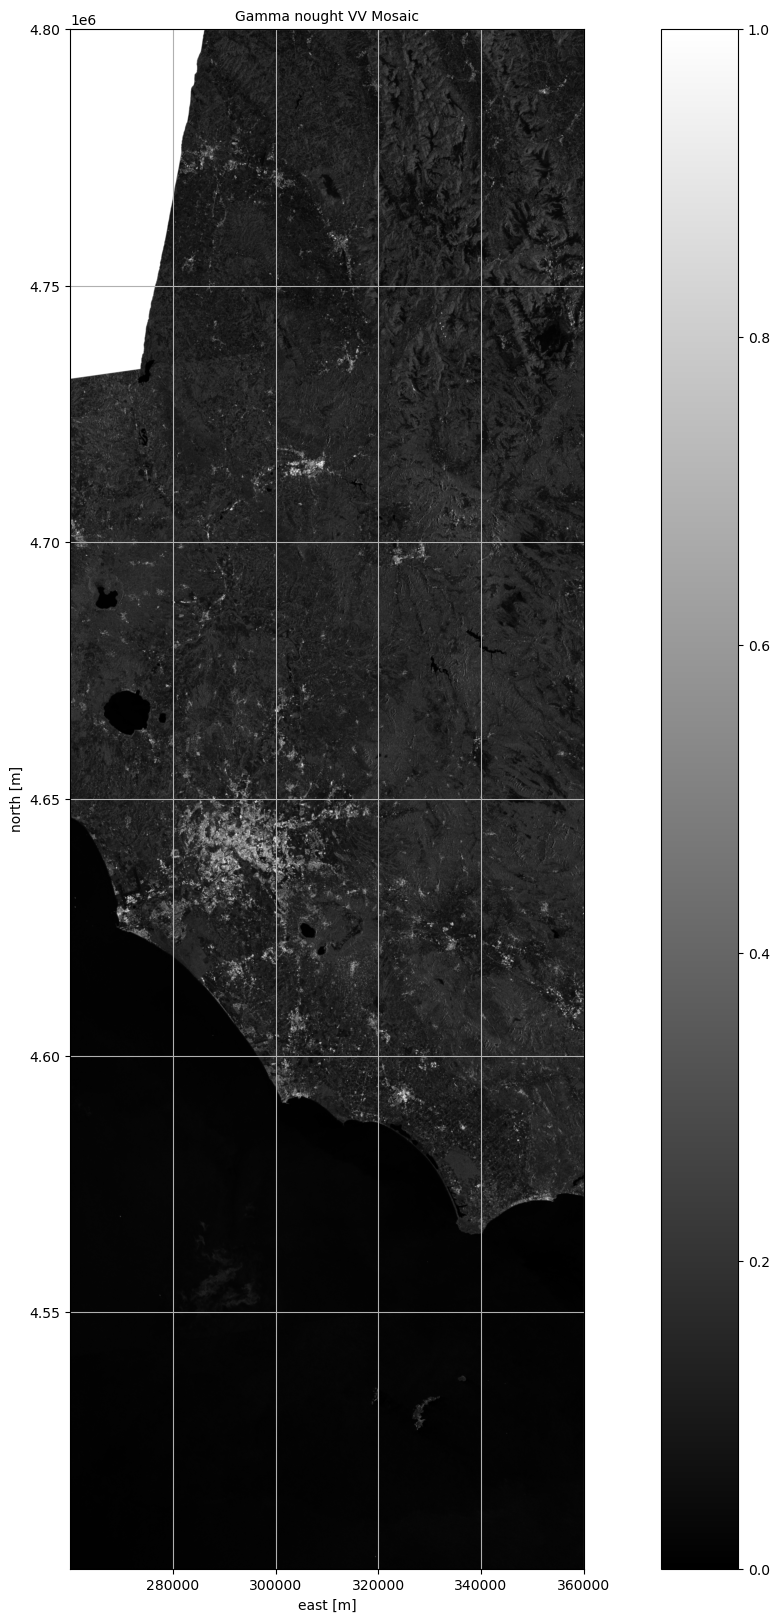

In [ ]:
extent = [
    mosaic.x.min().values,
    mosaic.x.max().values,
    mosaic.y.min().values,
    mosaic.y.max().values,
]
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(20, 20))
im1 = ax1.imshow(
    mosaic.isel(x=slice(None, None, 2), y=slice(None, None, 2)),
    cmap=plt.cm.gray,
    interpolation="bilinear",
    vmin=0,
    vmax=1,
    origin="lower",
    extent=extent,
)
ax1.set_xlabel("east [m]", fontsize=10)
ax1.set_ylabel("north [m]", fontsize=10)
ax1.set_title("Gamma nought VV Mosaic", fontsize=10)
ax1.grid()
fig.colorbar(im1, ax=ax1, orientation="vertical")

In [ ]:
mosaic

<xarray.DataArray (y: 30001, x: 10001)> Size: 2GB
dask.array<truediv, shape=(30001, 10001), dtype=float64, chunksize=(1024, 1024), chunktype=numpy.ndarray>
Coordinates:
    polarization  <U2 8B 'VV'
  * x             (x) float64 80kB 2.6e+05 2.6e+05 2.6e+05 ... 3.6e+05 3.6e+05
  * y             (y) float64 240kB 4.5e+06 4.5e+06 4.5e+06 ... 4.8e+06 4.8e+06

<a id="Save-and-re-read-derived-products"></a>
# 6. Save & re-read derived products


<a id="Save-and-re-read-mosaic-with-x-array-from-remote-storage"></a>
## Save & re-read mosaic with x-array from remote storage


<a id="Save-and-re-read-mosaic-with-x-array-from-local-storage"></a>
## Save & re-read mosaic with x-array from local storage


In [ ]:
f = "DIR_TO_WRITE_YOUR_PRODUCT/S1A_NRB_VV_UTM33_260005_360005_4500025_4800025.zarr"
mosaic.chunk(1024).to_dataset(name="nrb").to_zarr(f, group="measurements", mode="w")
nlooks.chunk(1024).to_dataset(name="nlooks").to_zarr(f, group="quality", mode="a")
dt_mosaic = datatree.open_datatree(f, engine="zarr")
dt_mosaic

<a id="Read-mosaic-with-EOPF-from-local-storage"></a>
## Read mosaic with EOPF from local storage


In [ ]:
# xs = EOZarrStore(
#     "DIR_TO_WRITE_YOUR_PRODUCT/S1A_NRB_VV_UTM33_260005_360005_4500025_4800025.zarr"
# )
# ss = xs.open()

In [ ]:
# eop = ss.load()
# eop

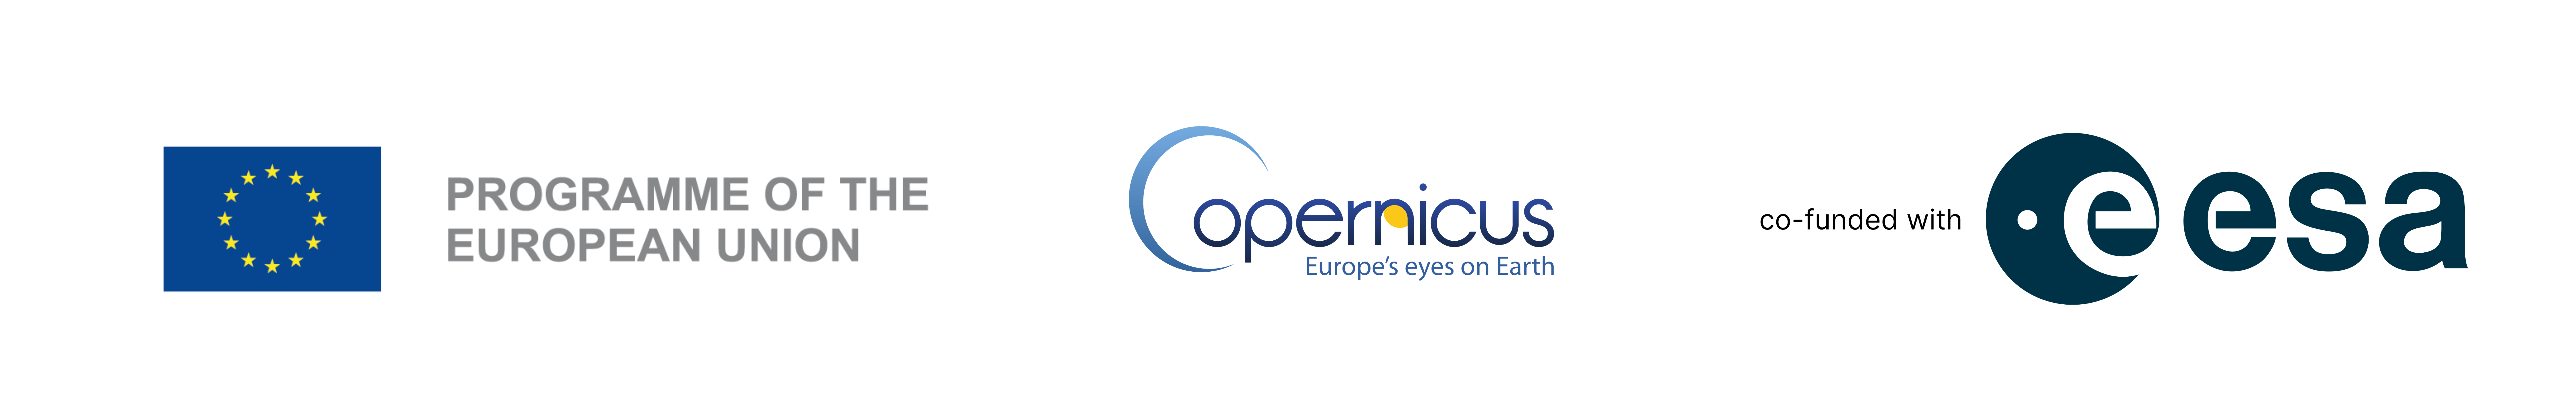